# Segment Anything
https://github.com/facebookresearch/segment-anything

In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/rn/ldbg1j1x57959rctk0_61my80000gn/T/pip-req-build-6z48b3o6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/rn/ldbg1j1x57959rctk0_61my80000gn/T/pip-req-build-6z48b3o6
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36600 sha256=141f84ed2082263edb389b075eee6b39c63223661e1e2574ecfc39c47d88a21e
  Stored in directory: /private/var/folders/rn/ldbg1j1x57959rctk0_61my80000gn/T/pip-ephem-wheel-cache-vj3w5cz6/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything
  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached matplotlib-3.

In [4]:
!wget -P checkpoints/ https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2025-03-19 11:12:29--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
dl.fbaipublicfiles.com (dl.fbaipublicfiles.com) をDNSに問いあわせています... 2600:9000:21ee:fe00:13:6e38:acc0:93a1, 2600:9000:21ee:8a00:13:6e38:acc0:93a1, 2600:9000:21ee:de00:13:6e38:acc0:93a1, ...
dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2600:9000:21ee:fe00:13:6e38:acc0:93a1|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 2564550879 (2.4G) [binary/octet-stream]
`checkpoints/sam_vit_h_4b8939.pth' に保存中

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  73.2MB/s 時間 35s        

2025-03-19 11:13:03 (70.8 MB/s) - `checkpoints/sam_vit_h_4b8939.pth' へ保存完了 [2564550879/2564550879]



In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

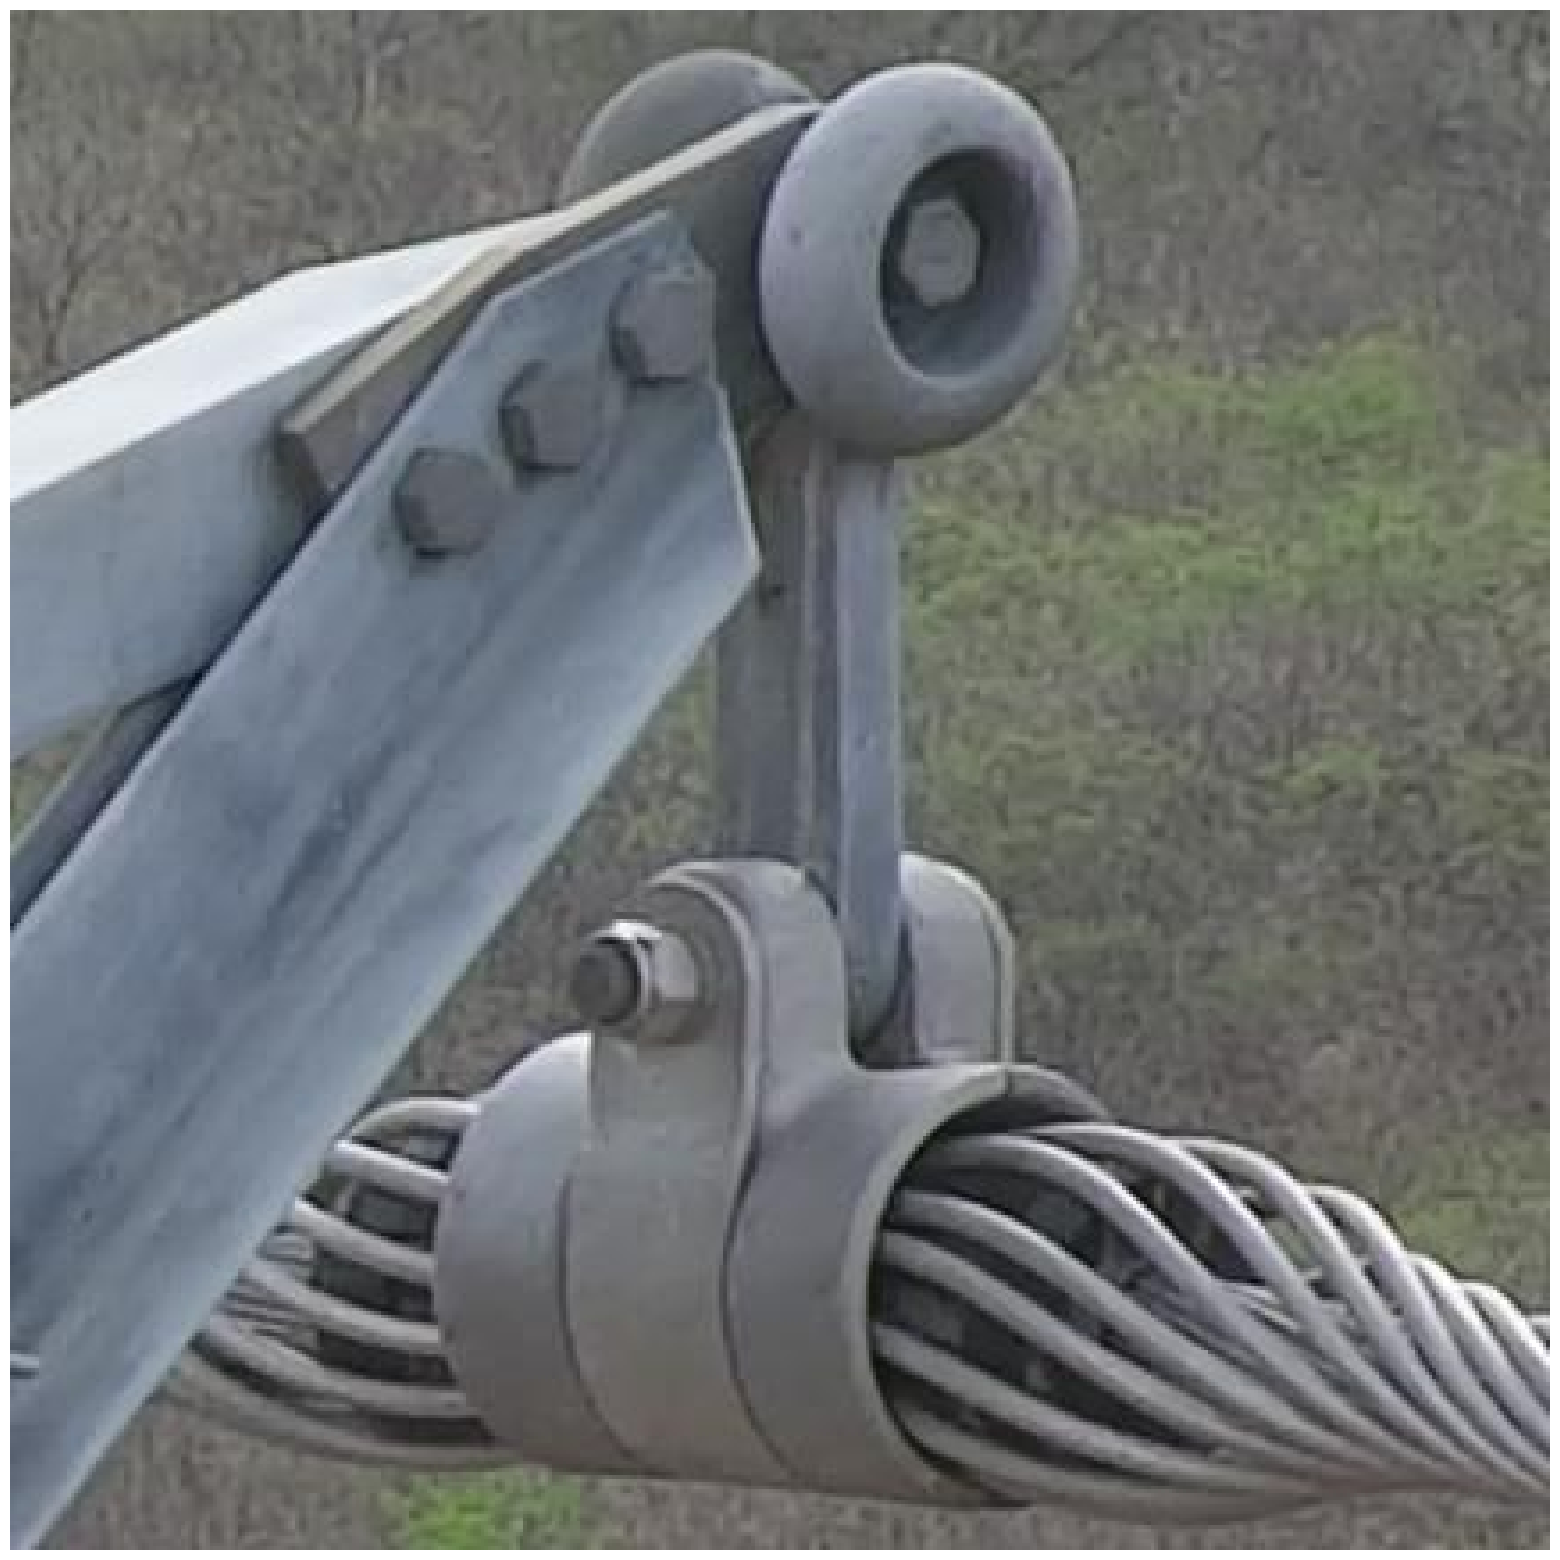

In [3]:
# img_path = "data/Town01_Opt_120/ClearNoon/height20m/rgb/00000.jpg"
img_path = "data/InsPLAD-fault/defect_supervised/yoke-suspension/train/good/Fotos 01-12-2020_DJI_0019_amarra_balancim_336.jpg"

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis("off")
plt.show()

In [4]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

sam = sam_model_registry["vit_h"](checkpoint="checkpoints/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

In [5]:
masks = mask_generator.generate(image)

In [6]:
print(len(masks))
print(masks[0].keys())

40
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


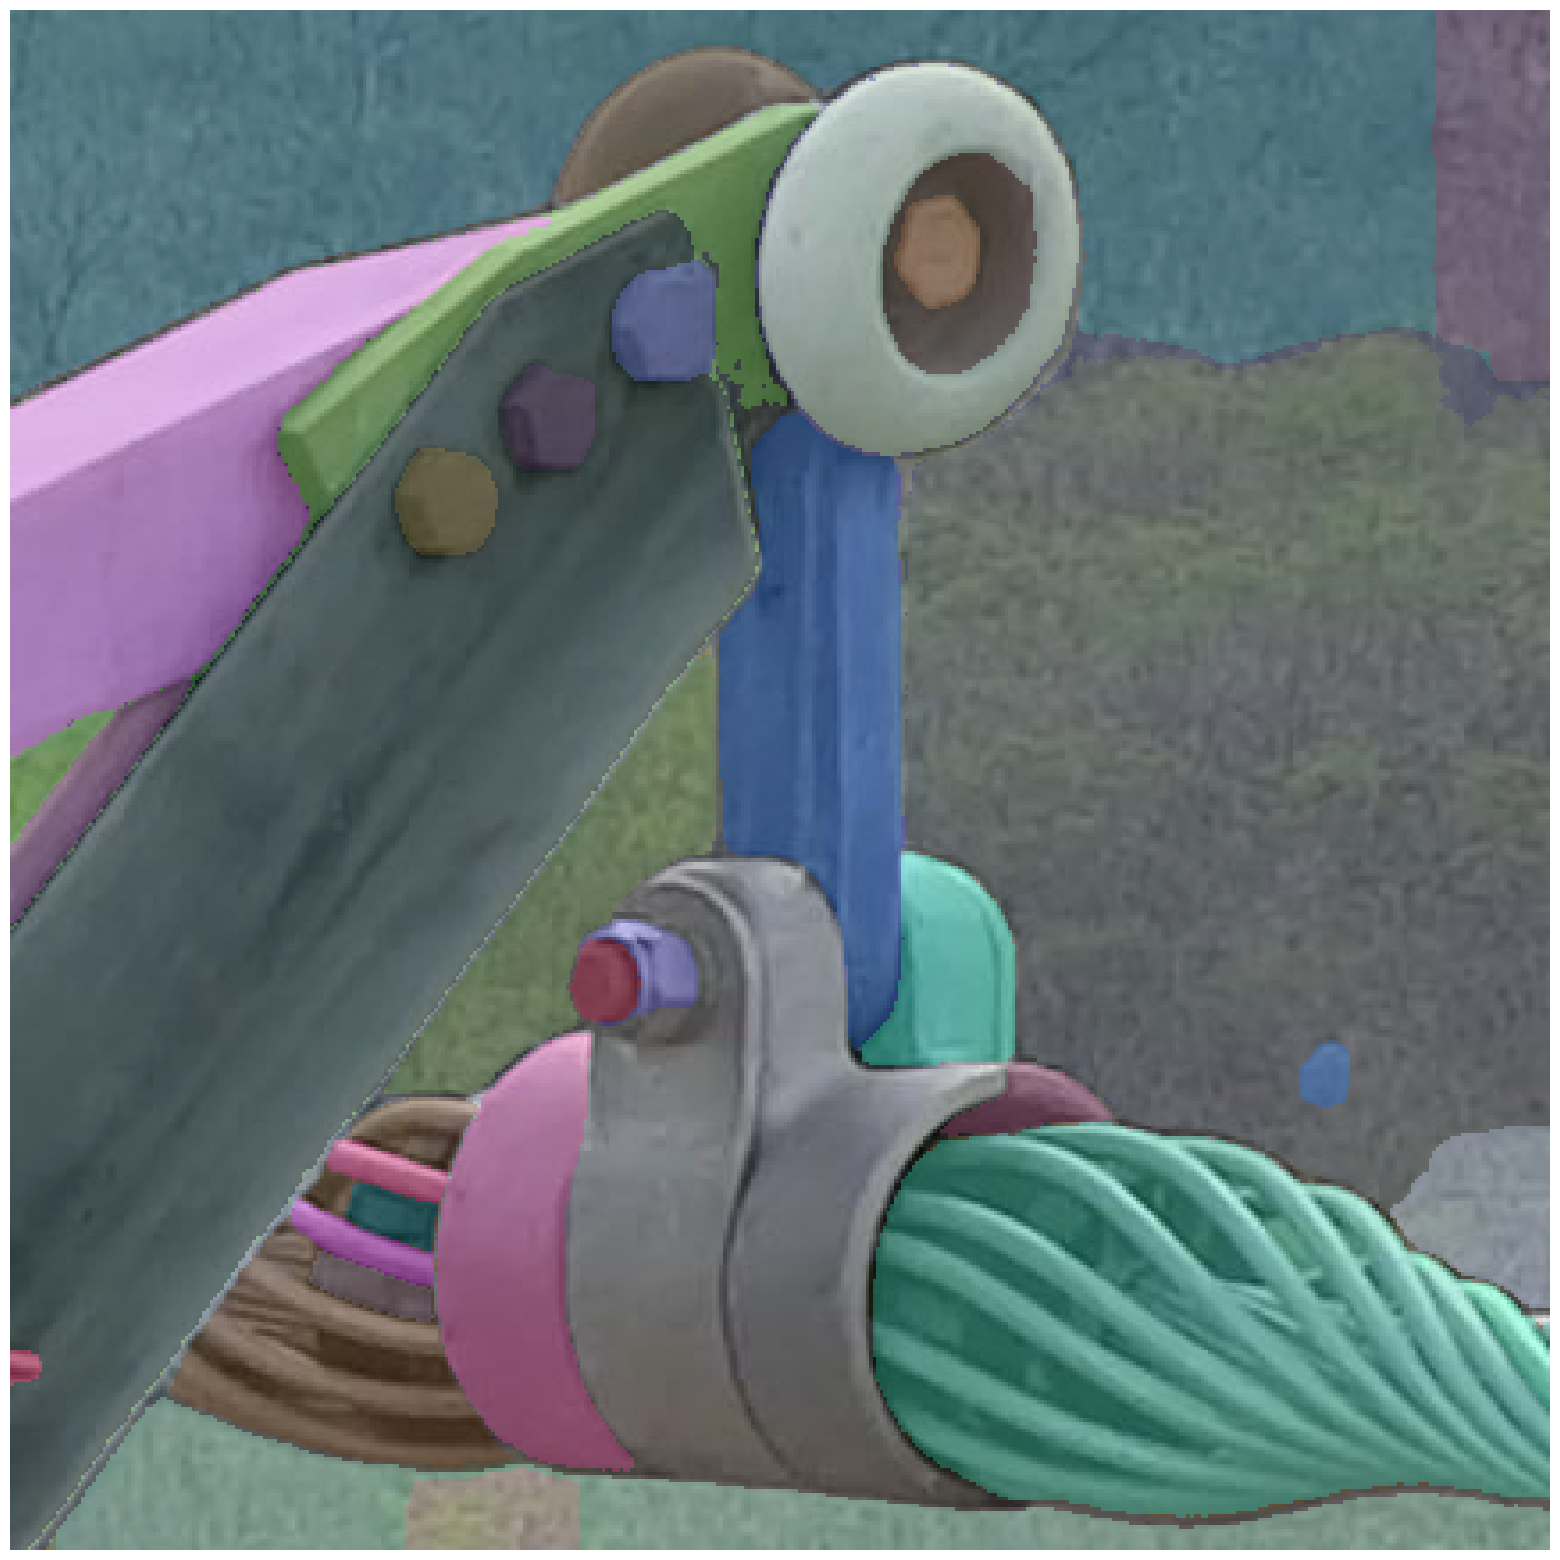

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 